In [1]:
import pandas as pd
lion_data = pd.read_csv("/disk2/ksebestyen/lion_mean_pool1.csv")
lion_data

,Unnamed: 0,term,year,embedding,count
0,0,lion,"(1645, 1646]","[-0.5970355, 1.2662178, -1.0647467, 0.70981675...",1.0
1,1,lion,"(1653, 1654]","[0.12913223, 0.8197904, -0.13049658, -0.089374...",12.0
2,2,lion,"(1659, 1660]","[0.06352369, 0.63748586, 0.027253559, -0.15486...",16.0
3,3,lion,"(1661, 1662]","[0.34589016, 0.50197816, -0.74495876, -0.01942...",2.0
4,4,lion,"(1665, 1666]","[0.34311983, 0.74077266, -0.13757844, -7.18303...",11.0
...,...,...,...,...,...
248,248,lion,"(1979, 1980]","[0.26464003, 0.45290053, -0.09660279, -0.11269...",6.0
249,249,lion,"(1982, 1983]","[0.92800826, 0.5945018, -0.18105188, -0.000280...",20.0
250,250,lion,"(1988, 1989]","[0.5686027, 0.5275335, 0.06460462, -0.08960488...",12.0
251,251,lion,"(1991, 1992]","[0.29426432, 0.077457584, -0.20458242, 0.09522...",2.0


In [2]:
lion_data["decade"] = lion_data.year.apply(lambda x: str(x)[1:4] + "0")
lion_data

,Unnamed: 0,term,year,embedding,count,decade
0,0,lion,"(1645, 1646]","[-0.5970355, 1.2662178, -1.0647467, 0.70981675...",1.0,1640
1,1,lion,"(1653, 1654]","[0.12913223, 0.8197904, -0.13049658, -0.089374...",12.0,1650
2,2,lion,"(1659, 1660]","[0.06352369, 0.63748586, 0.027253559, -0.15486...",16.0,1650
3,3,lion,"(1661, 1662]","[0.34589016, 0.50197816, -0.74495876, -0.01942...",2.0,1660
4,4,lion,"(1665, 1666]","[0.34311983, 0.74077266, -0.13757844, -7.18303...",11.0,1660
...,...,...,...,...,...,...
248,248,lion,"(1979, 1980]","[0.26464003, 0.45290053, -0.09660279, -0.11269...",6.0,1970
249,249,lion,"(1982, 1983]","[0.92800826, 0.5945018, -0.18105188, -0.000280...",20.0,1980
250,250,lion,"(1988, 1989]","[0.5686027, 0.5275335, 0.06460462, -0.08960488...",12.0,1980
251,251,lion,"(1991, 1992]","[0.29426432, 0.077457584, -0.20458242, 0.09522...",2.0,1990


In [3]:
lion_data["embedding"] = lion_data.embedding.apply(lambda x: eval(x))
#lion_data["embedding"]

import numpy as np

def np_mean(x):
    return np.mean(np.array(x.values.tolist()),axis=0).tolist()

lion_agg = lion_data.groupby("decade").agg({'embedding':np_mean, 'count':'sum'}).reset_index()
lion_agg

,decade,embedding,count
0,1640,"[-0.5970355, 1.2662178, -1.0647467, 0.70981675...",1.0
1,1650,"[0.09632795999999999, 0.72863813, -0.051621510...",28.0
2,1660,"[0.4666358133333333, 0.6892147733333333, -0.51...",104.0
3,1670,"[0.5483710435, 0.7676410650000001, -0.06211441...",135.0
4,1680,"[0.5835021925, 0.883030875, -0.061129955010000...",130.0
5,1690,"[0.35109743333333326, 0.35645190266666665, -0....",23.0
6,1700,"[0.39920752499999995, 0.54967139325, -0.384380...",72.0
7,1710,"[0.340828391, 0.58669479, -0.30280247, -0.1312...",107.0
8,1720,"[0.7789524766666668, 0.8227926233333333, -0.87...",56.0
9,1730,"[0.54180781, 0.738167035, -0.1761411125, 0.134...",58.0


In [4]:
docs_per_year = pd.read_csv("/disk2/ksebestyen/extCompDB.csv")
docs_per_year["decade"] = pd.read_csv("/disk2/ksebestyen/extCompDB.csv").Year.apply(lambda x: str(x)[0:3] + "0")

decade_count = docs_per_year.groupby("decade")["decade"].count()

lion_agg.join(pd.DataFrame(decade_count))

/disk2/ksebestyen/pythonEnvironment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: columns overlap but no suffix specified: Index(['decade'], dtype='object')

In [5]:
lion_agg.reset_index()

,index,decade,embedding,count
0,0,1640,"[-0.5970355, 1.2662178, -1.0647467, 0.70981675...",1.0
1,1,1650,"[0.09632795999999999, 0.72863813, -0.051621510...",28.0
2,2,1660,"[0.4666358133333333, 0.6892147733333333, -0.51...",104.0
3,3,1670,"[0.5483710435, 0.7676410650000001, -0.06211441...",135.0
4,4,1680,"[0.5835021925, 0.883030875, -0.061129955010000...",130.0
5,5,1690,"[0.35109743333333326, 0.35645190266666665, -0....",23.0
6,6,1700,"[0.39920752499999995, 0.54967139325, -0.384380...",72.0
7,7,1710,"[0.340828391, 0.58669479, -0.30280247, -0.1312...",107.0
8,8,1720,"[0.7789524766666668, 0.8227926233333333, -0.87...",56.0
9,9,1730,"[0.54180781, 0.738167035, -0.1761411125, 0.134...",58.0


In [6]:
glob_emb = np.mean(np.array(lion_agg.embedding.values.tolist()),axis=0)

time_series = []

from sklearn.metrics.pairwise import cosine_similarity


for i in range(1,lion_agg.shape[0]):
    #time_series.append((lion_agg.iloc[i].decade,cosine_similarity([glob_emb],[np.mean(np.array(lion_agg[0:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], lion_agg.iloc[i]['count']))
    time_series.append((lion_agg.iloc[i].decade,cosine_similarity([np.mean(np.array(lion_agg[(i-1):i].embedding.values.tolist()),axis=0)],[np.mean(np.array(lion_agg[i:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], lion_agg.iloc[i]['count']))

result = pd.DataFrame(time_series, columns = ['Decade','Cos','Freq'])

In [7]:
result

,Decade,Cos,Freq
0,1650,0.373473,28.0
1,1660,0.745074,104.0
2,1670,0.831644,135.0
3,1680,0.810230,130.0
4,1690,0.814326,23.0
5,1700,0.779153,72.0
6,1710,0.793782,107.0
7,1720,0.697753,56.0
8,1730,0.703362,58.0
9,1740,0.864920,55.0


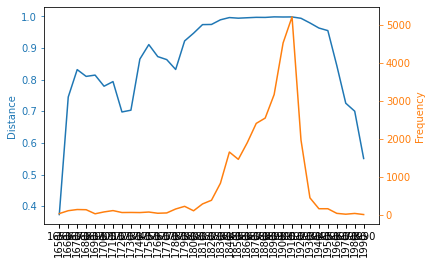

In [8]:
import matplotlib.pyplot as plt



fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(result.Decade, result.Cos, color="C0")
#ax.set_xlabel("Year", color="black")
ax.set_ylabel("Distance", color="C0")
#ax.tick_params(axis='x', colors="C0", )
ax.tick_params(axis='y', colors="C0")

ax2.plot(result.Decade, result.Freq, color="C1")
ax2.yaxis.tick_right()
#ax2.set_xlabel('Year', color="black") 
ax2.set_ylabel('Frequency', color="C1")       
#ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
plt.xticks(rotation=90)
plt.show()

#fig=plt.figure()
#plt.close("all")
#plt.figure()
#plt.plot(figsize=(10,6))
#plt.plot(result.Decade, result.Cos, label="lion")
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()